In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim import corpora, models, matutils
import nltk
pd.set_option('display.max_rows', 2000)
import spacy
nlp = spacy.load('en_core_web_sm')

In [8]:
import re
docs_df = pd.read_pickle('docs_raw.pkl')
docs_df['ep_name']=docs_df.ep_name.apply(lambda x: x.strip('- '))
docs_df['no_char']=docs_df.lines.apply(lambda x: len(x))

In [528]:
mike_df = docs_df[docs_df.character=='Michael']
mike_df.drop(columns=['character'], inplace=True)
mike_df['spacy_doc']=list(nlp.pipe(mike_df.lines))
clean_docs = [[token.lemma_.lower() for token in doc
              if (not token.is_stop and not token.is_punct and not token.like_num 
                 and not token.pos=='ADJ' and not token.pos=='VERB')&
              (token.pos_=='NOUN' or token.pos_=='PROPN')] for doc in mike_df.spacy_doc]
mike_df['clean_doc']=[' '.join(doc) for doc in clean_docs]
mike_df['clean_doc']=mike_df['clean_doc'].apply(lambda x: 
                                                x.replace('phylli ', 'phyllis ')
                                                .replace('mother', 'mom')
                                                .replace('ctim ', 'victim ')
                                                .replace('rder', 'murder')
                                                .replace('omurder', 'order')
                                               )
mike_df['clean_doc'] = mike_df.clean_doc.replace('/(\[.*?\])/g',regex=True)

In [416]:
#determine topics
def get_topics(n_topics, n_terms, model, term_list):
    for i in range(n_topics):
        top_terms = np.argsort(model.components_[i])[::-1][:n_terms]
    
    # get term indices, sorted (descending) by topic weights    
        topic_weights = np.array(model.components_[i][top_terms[0]])
        for b in top_terms[1:]:
            topic_weights= np.append(topic_weights, model.components_[i][b])
    # use the `terms` array to get the actual top terms

        term_names = [terms[item] for item in top_terms]
        print(i, topic_weights, term_names)

In [485]:
stopwords = nltk.corpus.stopwords.words('english')
words_to_cut =['walk', 'stand', 'hold', 'voice',
               'room', 'eat', 'stop','body', 'tonight','year',  'hear', 'sorry',
              'dollar', 'pay', 'list', 'throw', 'mmhmm', 'good', 'no', 'ahh', 'answer', 'area', 'arm', 'awesome', 
               'bet', 'bring', 'camera','cell', 'certain', 'check', 'co', 'cool', 'interesting', 'mm',
               'mmm', 'mr', 'night', 'movie', 'ohh', 'okay', 'one', 'able', 'air', 
               'background', 'blue', 'bathroom' ,'chuckle', 'fine', 'form', 'giggle', 'gah',
              'god', 'glass', 'half','hand', 'hard' , 'head', 'help','high','hmm', 'hmmm',
              'hour', 'interested', 'information', 'kind', 'large', 'laugh', 'late', 'leg',
              'lesson', 'level', 'lip', 'line', 'light', 'look', 'long', 'luck', 'matter',
              'member', 'middle', 'mean', 'mind', 'moment', 'minute', 'mouth', 'need', 'nod',
              'news', 'name', 'noise', 'normal', 'old', 'ok', 'number', 'open', 'option',
              'pack', 'past', 'park', 'phone', 'point', 'piece', 'place', 'pocket', 'present',
              'pounds', 'purpose', 'ready', 'real', 'reason', 'sake', 'rule' , 'row', 'road',
              'sh', 'shh', 'shoe', 'shirt', 'sick', 'seat', 'sec', 'shop', 'smile', 'soft',
               'space', 'sort', 'start', 'step', 'strong', 'stuff', 'stupid', 'sure', 'table', 
               'sweet', 'term', 'thank', 'thought', 'terrible', 'tomorrow', 'tough', 'tree',
               'try', 'true', 'type', 'wave', 'watch', 'weekend', 'welcome', 'well', 'whisper',
               'window', 'worried', 'world', 'word','worth', 'young', 'ya', 'wrong', 'yesterday',
              'person', 'sigh', 'feeling', 'door', 'wall', 'umm', 'difference', 'bag', 'street', 
              'month', 'morning', 'second', 'ear', 'eye', 'afternoon', 'button',]
stopwords.extend(words_to_cut)

In [542]:
cv_name = CountVectorizer(lowercase=False, stop_words = stopwords) 
X_counts=cv_name.fit_transform(mike_df.clean_doc)
mike_counts_df = pd.DataFrame(X_counts.toarray(), columns= cv_name.get_feature_names())
terms_counts=np.array(doc_term_df.columns.tolist())

In [550]:
words = mike_counts_df.columns.tolist()
counts = []
for i in words:
    counts.append(mike_counts_df[i].sum())

top_words = dict(zip(words, counts))
import operator

sorted_words = sorted(top_words.items(), key=operator.itemgetter(1))[::-1]


In [582]:
cv = CountVectorizer(lowercase=False, stop_words = stopwords,max_df=0.85, min_df=0.05,max_features=550) 
X=cv.fit_transform(mike_df.clean_doc)
doc_term_df = pd.DataFrame(X.toarray(), columns= cv.get_feature_names())
terms=np.array(doc_term_df.columns.tolist())

In [535]:
tfidf = TfidfVectorizer(stop_words = stopwords,
                       lowercase = False, max_df=0.33, min_df=0.05) # keeps words of 3 or more characters
X_idf=tfidf.fit_transform(mike_df.clean_doc)
doc_term_idf_df = pd.DataFrame(X_idf.toarray(), columns=tfidf.get_feature_names())
terms_idf = np.array(doc_term_idf_df.columns.to_list())

In [533]:
terms

array(['ability', 'accent', 'accident', 'account', 'act', 'advice',
       'affair', 'afternoon', 'airplane', 'angel', 'announcement',
       'applause', 'ass', 'attention', 'baby', 'bacon', 'ball', 'bed',
       'bill', 'bird', 'birthday', 'bitch', 'blah', 'blind', 'blood',
       'bob', 'boner', 'boo', 'boob', 'book', 'boom', 'bottle', 'box',
       'boy', 'boyfriend', 'brain', 'branch', 'break', 'breakfast',
       'breath', 'brother', 'buddy', 'building', 'bunch', 'butter',
       'button', 'cake', 'call', 'card', 'care', 'carol', 'case', 'cash',
       'cause', 'celebration', 'center', 'cfo', 'chain', 'chair',
       'chance', 'character', 'charge', 'charles', 'cheer', 'cheese',
       'chest', 'chicken', 'child', 'chocolate', 'christmas', 'city',
       'clap', 'class', 'client', 'clock', 'club', 'coat', 'coffee',
       'college', 'color', 'comedy', 'computer', 'condo', 'contest',
       'conversation', 'corner', 'costume', 'couple', 'course', 'crack',
       'cream', 'credit', 

In [565]:
from sklearn.decomposition import PCA
pca = PCA(5)
pca.fit(doc_term_df)
get_topics(5, 10, pca, terms)

0 [0.56379064 0.54302572 0.47074206 0.16637867 0.12086884 0.11294669
 0.10398097 0.07505022 0.06850327 0.06830535] ['new', 'york', 'pizza', 'city', 'sale', 'david', 'video', 'screen', 'egg', 'branch']
1 [0.890053   0.20752597 0.11975306 0.0984427  0.08983721 0.07655296
 0.07175036 0.06524978 0.06503864 0.0634786 ] ['meredith', 'water', 'christmas', 'crack', 'dog', 'employee', 'respect', 'doctor', 'creed', 'accident']
2 [0.86251526 0.14360458 0.14006275 0.13421561 0.13321679 0.11300139
 0.10708976 0.10015474 0.09142148 0.08127254] ['packer', 'joke', 'truck', 'todd', 'sale', 'sense', 'dog', 'family', 'manager', 'package']
3 [0.45679256 0.36477349 0.30599487 0.27525258 0.25548551 0.22138545
 0.13730179 0.11713405 0.11024529 0.0989644 ] ['dog', 'winner', 'team', 'egg', 'manager', 'foot', 'record', 'david', 'humor', 'sale']
4 [0.43180752 0.24699644 0.21669999 0.19999695 0.17694876 0.13467694
 0.13166452 0.09218598 0.09096556 0.08955932] ['video', 'joke', 'new', 'david', 'york', 'family', 'f

In [566]:
from sklearn.decomposition import NMF
nmf = NMF(5)
nmf.fit(doc_term_idf_df)
get_topics(5, 10, nmf, terms_idf)

/Users/aathirachennat/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


IndexError: index 309 is out of bounds for axis 0 with size 301

In [325]:
nmf2_df = pd.DataFrame(nmf.transform(doc_term_idf_df), columns=['family', 'job', 'sales', 'sex', 'childhood/toby'])
modeled_df = pd.merge(mike_df.iloc[:, [1,2]].reset_index(), nmf2_df, right_index=True, left_index=True)

,index,episode_no,ep_name,family,job,sales,sex,childhood/toby
0,0,"(2, 1)",The Dundies,0.235468,0.058781,0.000000,0.102885,0.102328
1,63,"(2, 2)",Sexual Harassment,0.069669,0.000000,0.503103,0.000000,0.134432
2,124,"(2, 21)",Conflict Resolution,0.233772,0.000000,0.000615,0.154881,0.004751
3,138,"(2, 12)",The Injury,0.037537,0.000000,0.008295,0.215196,0.306821
4,23,"(2, 14)",The Carpet,0.000000,0.065144,0.689270,0.015787,0.000000
5,188,"(2, 18)",Take Your Daughter to Work Day,0.029631,0.033644,0.000000,0.000000,0.388167
6,111,"(2, 6)",The Fight,0.000000,0.000000,0.273980,0.211553,0.136153
7,170,"(2, 5)",Halloween,0.071961,0.000000,0.000000,0.421649,0.000000
8,43,"(2, 9)",E-Mail Surveillance,0.306742,0.124969,0.000000,0.000000,0.000000
9,93,"(2, 16)",Valentine's Day,0.141389,0.174549,0.000000,0.000000,0.000000


In [326]:
modeled_df['season']=modeled_df.episode_no.apply(lambda x: x[0])
by_season = modeled_df.groupby('season', as_index=False)[['family', 'job', 'sales', 'sex', 'childhood/toby']].mean()
by_season

,season,family,job,sales,sex,childhood/toby
0,2,0.102379,0.056357,0.134115,0.113381,0.109834
1,3,0.140061,0.131896,0.020565,0.064511,0.044857
2,4,0.140401,0.020457,0.009585,0.187583,0.083500
3,5,0.074702,0.206766,0.015849,0.059336,0.051950
4,6,0.048728,0.076378,0.003501,0.163949,0.169727
5,7,0.050779,0.039600,0.078221,0.125726,0.145847


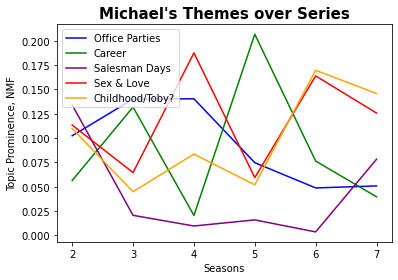

In [343]:
plt.plot(by_season['season'], by_season['family'], color='b')
plt.plot(by_season['season'], by_season['job'], color='g')
plt.plot(by_season['season'], by_season['sales'], color='purple')
plt.plot(by_season['season'], by_season['sex'], color='r')
plt.plot(by_season['season'], by_season['childhood/toby'], color='orange')
plt.title("Michael's Themes over Series", fontsize=15, weight='bold')
plt.legend(['Office Parties', 'Career', 'Salesman Days','Sex & Love', 'Childhood/Toby?'], loc=2)
plt.xlabel('Seasons')
plt.ylabel('Topic Prominence, NMF')
plt.savefig('mike_themes.png', transparent=True)
plt.show()


In [ ]:
print(nmf2_df.shape, mike_df.iloc[:, [1,2]].shape)

In [495]:
corpus = matutils.Sparse2Corpus(X.transpose())
id2word = dict((v,k) for k,v in cv.vocabulary_.items())
lda = models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=100)
lda.print_topics()

[(0,
  '0.040*"bird" + 0.034*"ball" + 0.033*"manager" + 0.029*"truck" + 0.026*"water" + 0.023*"toby" + 0.023*"monkey" + 0.020*"boss" + 0.020*"heart" + 0.019*"meredith"'),
 (1,
  '0.033*"boom" + 0.027*"school" + 0.025*"ryan" + 0.023*"baby" + 0.023*"erin" + 0.022*"character" + 0.017*"holly" + 0.017*"game" + 0.017*"college" + 0.017*"boss"'),
 (2,
  '0.029*"andy" + 0.029*"mom" + 0.025*"dog" + 0.022*"holly" + 0.021*"team" + 0.020*"winner" + 0.017*"sex" + 0.016*"love" + 0.015*"manager" + 0.015*"egg"'),
 (3,
  '0.036*"date" + 0.033*"end" + 0.030*"love" + 0.021*"fact" + 0.018*"idiot" + 0.018*"wedding" + 0.016*"team" + 0.014*"book" + 0.014*"creed" + 0.014*"picture"'),
 (4,
  '0.048*"party" + 0.037*"new" + 0.034*"york" + 0.029*"birthday" + 0.028*"toby" + 0.027*"pizza" + 0.021*"scranton" + 0.021*"angela" + 0.018*"lunch" + 0.017*"holly"'),
 (5,
  '0.057*"holly" + 0.029*"relationship" + 0.022*"couple" + 0.022*"andy" + 0.022*"erin" + 0.022*"meredith" + 0.022*"trip" + 0.022*"salesman" + 0.022*"song" 

In [139]:
noun_docs = [[token.lemma_.lower() for token in doc
              if (not token.is_stop and not token.is_punct and not token.like_num )&
              (token.pos_=='NOUN' or token.pos_=='PROPN')] for doc in mike_df.spacy_doc]

mike_df['noun_doc']=[' '.join(doc) for doc in noun_docs]

<ipython-input-139-383f9e11f84b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mike_df['noun_doc']=[' '.join(doc) for doc in noun_docs]


In [94]:
ner_tag = [[ent.text for ent in doc.ents if 
           (ent.label_=='PERSON' or ent.label_=='GPE' or ent.label_=='ORG' or ent.label_=='EVENT' 
           or ent.label_=='FAC' or ent.label_=='LANGUAGE' or ent.label_=='LOC' or ent.label_=='PRODUCT'
            or ent.label_=='WORK_OF_ART')] for doc in mike_df.spacy_doc]
mike_df['ner_tag']=[' '.join(doc) for doc in ner_tag]

<ipython-input-94-7b1748147deb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mike_df['ner_tag']=[' '.join(doc) for doc in ner_tag]


In [507]:
from corextopic import corextopic as ct
topic_model = ct.Corex(n_hidden=10, words=[i for i in terms_counts], seed=1)
topic_model.fit(X_idf, words=[i for i in terms_c], docs=mike_df.clean_doc)
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print(f'{n}: {", ".join(topic_words)}')

0: boy, new, york, truck, pant, turn, cash, load, pizza, memory
1: building, birthday, pennsylvania, idiot, dream, class, respect, cause, break, storm
2: family, ryan, tear, size, fire, stage, impression, applause, title, speakerphone
3: home, fun, monkey, honor, picture, charge, blood, rder, power, temp
4: humor, meredith, note, breakfast, ass, corner, package, celebration, groan, book
5: hell, order, love, management, exhale, condo, act, star, parent, packer
6: group, kelly, image, child, andy, rest, hope, drink, grab, computer
7: bunch, wallace, hug, floor, decision, breath, cfo, dad, laughter, chest
8: chance, course, hair, care, stair, monster, hr, college, employee, tour
9: bed, lover, king, story, girlfriend, club, tie, cheese, fish, tape


In [610]:
from corextopic import corextopic as ct
topic_model = ct.Corex(n_hidden=6
    , words=[i for i in terms], seed=1)
topic_model.fit(X, words=[i for i in terms], docs=mike_df.clean_doc, 
                anchors = [['pam'],
                           [ 'love', 'lover', 'heart', 'girlfriend', 'jan'], 
                          ['packer', 'comedy', 'accent', 'hr'], ['friend', 'jim', 'ryan', 'dwight'],
                            ['meeting', 'conference', 'manager']],
                anchor_strength=8)
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print(f'{n}: {", ".join(topic_words)}')

0: pam, attention, foot, halpert, idiot, office, stanley, work, pound, honor
1: heart, girlfriend, jan, lover, breath, scene, winner, supply, field, date
2: accent, hr, packer, comedy, holly, order, girl, sale, tear, day
3: dwight, jim, friend, ryan, trouble, brother, food, note, guest, temp
4: conference, manager, andy, humor, exhale, parking, company, respect, sebring, style
5: situation, jerk, hell, ball, decision, size, restaurant, character, job, paper


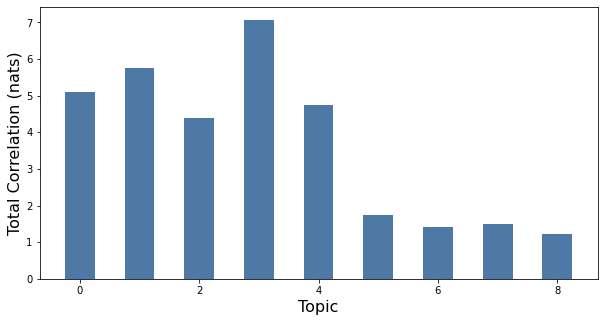

In [609]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [231]:
predictions = pd.DataFrame(topic_model.p_y_given_x, index= mike_df.ep_name,
                           columns=['topic'+str(i) for i in range(3)])
predictions

ValueError: Shape of passed values is (64, 10), indices imply (64, 3)

In [271]:
mike_dwight = docs_df[(docs_df.character=='Michael')|
                     (docs_df.character=='Dwight')]
mike_dwight['spacy_doc']=list(nlp.pipe(mike_dwight.lines))
clean_docs = [[token.lemma_.lower() for token in doc
              if (not token.is_stop and not token.is_punct and not token.like_num )&
              (token.pos_=='NOUN' or token.pos_=='PROPN' or
              token.pos_=="X")] for doc in mike_dwight.spacy_doc]
clean_docs = [word for word in clean_docs if word not in stopwords]

mike_dwight['clean_doc']=[' '.join(doc) for doc in clean_docs]

In [272]:
import scattertext as st
corpus = st.CorpusFromPandas( mike_dwight, category_col='character', text_col='clean_doc').build()
html = st.produce_scattertext_explorer(corpus, category='Michael', category_name='Michael',
                                      not_category_name='Dwight', minimum_term_frequency=10,
                                       pmi_threshold_coefficient=5,
                                       width_in_pixels=1000, metadata=mike_dwight['ep_name'])
open('mike_dwight.html', 'wb').write(html.encode('utf-8'));

In [277]:
jim_dwight = docs_df[(docs_df.character=='Jim')|
                     (docs_df.character=='Dwight')]
jim_dwight['spacy_doc']=list(nlp.pipe(jim_dwight.lines))
clean_docs = [[token.lemma_.lower() for token in doc
              if (not token.is_stop and not token.is_punct and not token.like_num )&
              (token.pos_=='NOUN' or token.pos_=='PROPN' or
              token.pos_=="X")] for doc in jim_dwight.spacy_doc]



clean_docs = [word for word in clean_docs if word not in stopwords]

jim_dwight['clean_doc']=[' '.join(doc) for doc in clean_docs]

In [282]:
clean_docs

[['michael',
  'temp',
  'year',
  'michael',
  'connection',
  'batman',
  'robin',
  'ranger',
  'tonto',
  'ranger',
  'tonto',
  'bonto',
  'alarm',
  'people',
  'test',
  'exit',
  'head',
  'exit',
  'desk',
  'panic',
  'drill',
  'paper',
  'company',
  'people',
  'place',
  'tinder',
  'box',
  'test',
  'stanley',
  'burn',
  'v*ctim',
  'exit',
  'smoke',
  'smoke',
  'smoke',
  'spot',
  'kelly',
  'nose',
  'mouth',
  'nose',
  'nose',
  'stocking',
  'flesh',
  'smoke',
  'line',
  'stat',
  'stat',
  'guy',
  'head',
  'count',
  'michael',
  'number',
  'michael',
  'ryan',
  'number',
  'count',
  'marjory',
  'today',
  'nickname',
  'musketeer',
  'musketeer',
  'fireman',
  'guy',
  'response',
  'time',
  'theory',
  'second',
  'question[/b',
  'axe',
  'book',
  'physician',
  'desk',
  'reference',
  'inside[/b',
  'car',
  'shock',
  'business',
  'school',
  'michael',
  'school',
  'knock',
  'self',
  'college',
  'scoff',
  'master',
  'ryan',
  'crow',
 

In [278]:
import scattertext as st
corpus = st.CorpusFromPandas( jim_dwight, category_col='character', text_col='clean_doc').build()
html = st.produce_scattertext_explorer(corpus, category='Jim', category_name='Jim',
                                      not_category_name='Dwight', minimum_term_frequency=10,
                                       pmi_threshold_coefficient=5,
                                       width_in_pixels=1000, metadata=jim_dwight['ep_name'])
open('jim_dwight.html', 'wb').write(html.encode('utf-8'));

In [279]:
mike_df.no_char.sum()

392762